In [1]:
import pandas as pd
from google.colab import files

df = files.upload()
data = pd.read_csv('twitter.csv')

Saving twitter.csv to twitter.csv


**Exploratory Data Analysis**

In [2]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


*this data has no columns*

In [3]:
data.columns = ['Tweet_Id','Topic','Sentiment','Text']

In [4]:
data.tail()

,Tweet_Id,Topic,Sentiment,Text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [8]:
data.isna().sum()

,0
Tweet_Id,0
Topic,0
Sentiment,0
Text,686


In [10]:
print("Jumlah Baris dan Kolom:", data.shape)
print("Jumlah NaN pada kolom text:", data['Text'].isna().sum())

Jumlah Baris dan Kolom: (74681, 4)
Jumlah NaN pada kolom text: 686


*Handle NaN(Missing Values)*

In [12]:
data = data.dropna(subset=['Text']).reset_index(drop=True)

*Handle Duplicate*

In [17]:
data.duplicated(subset=['Text']).sum()

np.int64(4505)

In [18]:
data = data.drop_duplicates(subset=['Text']).reset_index(drop=True)

In [19]:
print("Final Data Condition After Handling Missing Values ​​and Handling Duplicates:",
      data.shape)

Final Data Condition After Handling Missing Values ​​and Handling Duplicates: (69490, 4)


In [20]:
data.head()

,Tweet_Id,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Data Visualization**

Sentiment
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


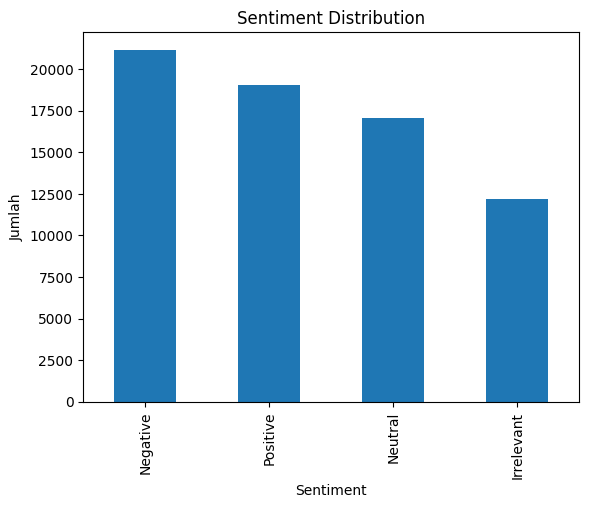

In [23]:
import matplotlib.pyplot as plt

SentimentCount = data['Sentiment'].value_counts()
print(SentimentCount
      )


plt.figure()
SentimentCount.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

count    69490.000000
mean        19.944481
std         14.247607
min          0.000000
25%          9.000000
50%         16.000000
75%         28.000000
max        198.000000
Name: text_length, dtype: float64


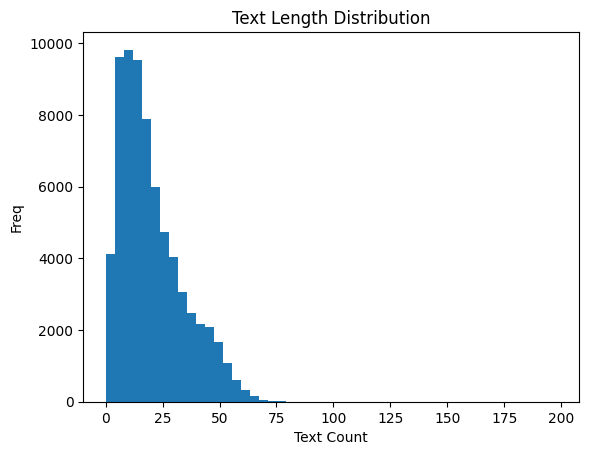

In [26]:
data['text_length'] = data['Text'].astype(str).apply(lambda x: len(x.split()))
print(data['text_length'].describe())

plt.figure()
plt.hist(data['text_length'],bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Text Count")
plt.ylabel("Freq")
plt.show()

<Figure size 640x480 with 0 Axes>

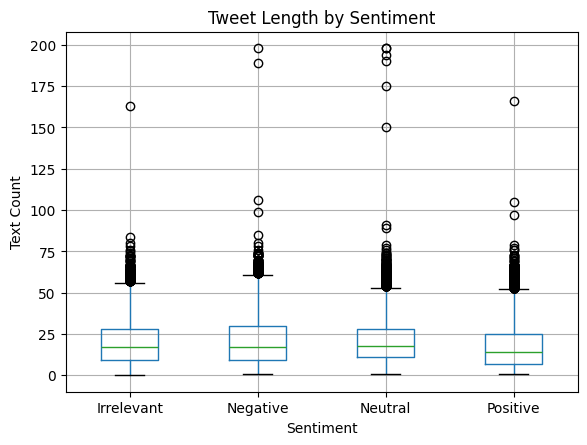

In [33]:
plt.figure()
data.boxplot(column="text_length",by='Sentiment')
plt.title("Tweet Length by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Text Count")
plt.show()

Top 10 Topic Topic
MaddenNFL               2260
CallOfDuty              2259
Verizon                 2258
NBA2K                   2242
Facebook                2226
Microsoft               2224
TomClancysGhostRecon    2220
johnson&johnson         2220
WorldOfCraft            2209
TomClancysRainbowSix    2209
Name: count, dtype: int64


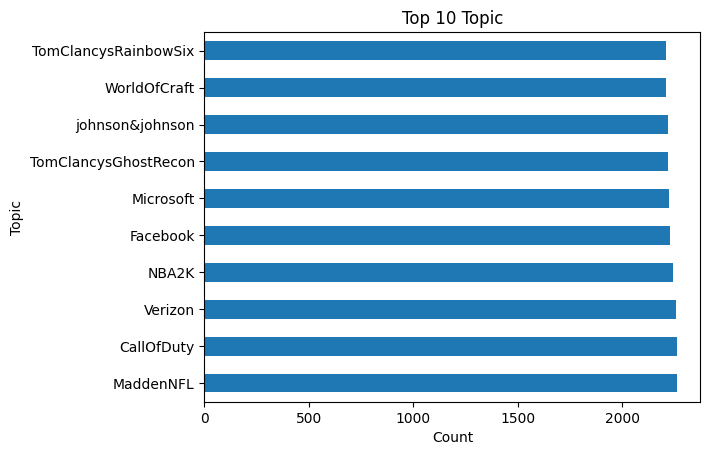

In [31]:
top_topic = data["Topic"].value_counts().head(10)
print("Top 10 Topic",top_topic)

plt.figure()
top_topic.plot(kind='barh')
plt.title("Top 10 Topic")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.show()

**Preprocessing**

In [100]:
import re
import pandas as pd
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

negation_words = {
    "no","not","nor","never","cannot","can't","won't",
    "don't","didn't","isn't","aren't","wasn't","weren't",
    "shouldn't","wouldn't","couldn't"
}

stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    text = text.lower()

    text = re.sub(r"http\S+|www\S+", "", text)


    text = re.sub(r"@\w+", " user ", text)

    text = re.sub(r"#(\w+)", r"\1", text)

    text = emoji.demojize(text, delimiters=(" ", " "))

    text = re.sub(r"[^a-z\s]", " ", text)


    tokens = []
    for word in text.split():
        if word not in stop_words:
            tokens.append(lemmatizer.lemmatize(word))

    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:

data["Clean_Text"] = data['Text'].apply(clean_text)

In [101]:
data[[ 'Sentiment','Text','Clean_Text']].head(20)

,Sentiment,Text,Clean_Text
0,Positive,I am coming to the borders and I will kill you...,coming border kill
1,Positive,im getting on borderlands and i will kill you ...,getting borderland kill
2,Positive,im coming on borderlands and i will murder you...,coming borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder
4,Positive,im getting into borderlands and i can murder y...,getting borderland murder
5,Positive,So I spent a few hours making something for fu...,spent hour making something fun know huge user...
6,Positive,So I spent a couple of hours doing something f...,spent couple hour something fun know huge user...
7,Positive,So I spent a few hours doing something for fun...,spent hour something fun know huge user fan ma...
8,Positive,So I spent a few hours making something for fu...,spent hour making something fun know huge rhan...
9,Positive,2010 So I spent a few hours making something f...,spent hour making something fun know huge rhan...
